# <b>Simple EDA - Sales and Customer Patterns</b>
https://www.kaggle.com/code/kabure/simple-eda-sales-and-customer-patterns/input?select=olist_orders_dataset.csv


## <b>Preprocessing</b>

### Load dataset

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
order_df = pd.read_csv('olist_orders_dataset.csv') # 주문

print(f'주문 데이터 개수: {len(order_df)}')
order_df.head(1)

주문 데이터 개수: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [58]:
print(order_df['order_id'].nunique())
print(order_df['customer_id'].nunique())

99441
99441


### <b>Shipping & Delivery process</b>
주문 완료(order_purchase_timestamp) -> 결제 승인(order_approved_at)  
-> 물류 전달(order_delivered_carrier_date) -> 고객 수령(order_delivered_customer_date)

In [59]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


#### Check Null value

In [60]:
order_df[order_df['order_approved_at'].isnull()] # 결제 승인의 null 값은 분석에 영향을 미치지 않으므로 유지

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [61]:
order_df[order_df['order_delivered_carrier_date'].isnull()] # 물류 전달일이 없으므로 drop

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [62]:
order_df[order_df['order_delivered_customer_date'].isnull()] # 고객 수령일이 없으므로 drop

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


#### Drop NaN value

In [63]:
order_df = order_df.dropna(subset=['order_delivered_carrier_date','order_delivered_customer_date'])

# 결과 확인
print(order_df.info()) # order_approved_at의 14개를 제외하고 모두 non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96475 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96475 non-null  object
 1   customer_id                    96475 non-null  object
 2   order_status                   96475 non-null  object
 3   order_purchase_timestamp       96475 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96475 non-null  object
 6   order_delivered_customer_date  96475 non-null  object
 7   order_estimated_delivery_date  96475 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB
None


#### Change Data types(object -> datetime)

In [64]:
# datetime으로 변환할 컬럼들 지정
datetime_columns = [
    'order_purchase_timestamp', 
    'order_approved_at', 
    'order_delivered_carrier_date', 
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

# 각 컬럼을 datetime 형식으로 변환
for col in datetime_columns:
    order_df[col] = pd.to_datetime(order_df[col], errors='coerce')

# 결과 확인
print(order_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96475 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96475 non-null  object        
 1   customer_id                    96475 non-null  object        
 2   order_status                   96475 non-null  object        
 3   order_purchase_timestamp       96475 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96475 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96475 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB
None


In [65]:
for col in datetime_columns:
    print(f"NaT 개수 in {col}: {order_df[col].isnull().sum()}") # order_approved_at의 NaN만 NaT로 바뀜

NaT 개수 in order_purchase_timestamp: 0
NaT 개수 in order_approved_at: 14
NaT 개수 in order_delivered_carrier_date: 0
NaT 개수 in order_delivered_customer_date: 0
NaT 개수 in order_estimated_delivery_date: 0


## Merge Data

### orders_dataset & customers_dataset

In [66]:
customer_df = pd.read_csv('olist_customers_dataset.csv') # 주문

print(f'주문 데이터 개수: {len(customer_df)}')
customer_df.head(1)

주문 데이터 개수: 99441


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [67]:
orders_with_customers = pd.merge(order_df, customer_df, on='customer_id', how='left')

print(f'주문 & 고객 데이터 개수: {len(customer_df)}')
orders_with_customers.head(1)

주문 & 고객 데이터 개수: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP


### orders_dataset & customers_dataset + geolocation_dataset

In [68]:
geolocation_df = pd.read_csv('olist_geolocation_dataset.csv') # 위치 데이터

print(f'위치 데이터 개수: {len(geolocation_df)}')
geolocation_df[geolocation_df['geolocation_zip_code_prefix']==24220][['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']].describe()

위치 데이터 개수: 1000163


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1146.0,1146.000000,1146.000000
mean,24220.0,-22.903245,-43.107024
std,0.0,0.002605,0.005132
min,24220.0,-22.910523,-43.115982
25%,24220.0,-22.904961,-43.111609
50%,24220.0,-22.903166,-43.107131
75%,24220.0,-22.901435,-43.102933
max,24220.0,-22.898404,-43.092417


In [69]:
# 그룹별 대표값 계산
geolocation_df = geolocation_df.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean',
    'geolocation_city': 'first', # 첫 번째 값 선택
    'geolocation_state': 'first'
}).reset_index()

print(len(geolocation_df))
geolocation_df.head()

19015


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1001,-23.550190,-46.634024,sao paulo,SP
1,1002,-23.548146,-46.634979,sao paulo,SP
2,1003,-23.548994,-46.635731,sao paulo,SP
3,1004,-23.549799,-46.634757,sao paulo,SP
4,1005,-23.549456,-46.636733,sao paulo,SP


In [70]:
print(f'주문 & 고객 데이터 개수: {len(customer_df)}')
orders_with_customers.head(1)

주문 & 고객 데이터 개수: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP


In [71]:
# order_df, customer_df, geolocation_df 병합 - left join
order_customer_geo_df = pd.merge(
    orders_with_customers, 
    geolocation_df, 
    left_on='customer_zip_code_prefix', 
    right_on='geolocation_zip_code_prefix', 
    how='left'
)

print(len(order_customer_geo_df))
order_customer_geo_df.head(1) # merge의 카르테시안 곱: 중복된 행을 제거하는 후속 연산 적용

96475


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3149.0,-23.576983,-46.587161,sao paulo,SP


#### Drop NaN value

In [72]:
order_customer_geo_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96475 entries, 0 to 96474
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96475 non-null  object        
 1   customer_id                    96475 non-null  object        
 2   order_status                   96475 non-null  object        
 3   order_purchase_timestamp       96475 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96475 non-null  datetime64[ns]
 6   order_delivered_customer_date  96475 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96475 non-null  datetime64[ns]
 8   customer_unique_id             96475 non-null  object        
 9   customer_zip_code_prefix       96475 non-null  int64         
 10  customer_city                  96475 non-null  object        
 11  customer_state 

In [73]:
order_customer_geo_df = order_customer_geo_df.dropna(subset=['geolocation_zip_code_prefix'])

# 결과 확인
print(order_customer_geo_df.info()) # order_approved_at의 14개를 제외하고 모두 non-null

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96211 entries, 0 to 96474
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96211 non-null  object        
 1   customer_id                    96211 non-null  object        
 2   order_status                   96211 non-null  object        
 3   order_purchase_timestamp       96211 non-null  datetime64[ns]
 4   order_approved_at              96197 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96211 non-null  datetime64[ns]
 6   order_delivered_customer_date  96211 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96211 non-null  datetime64[ns]
 8   customer_unique_id             96211 non-null  object        
 9   customer_zip_code_prefix       96211 non-null  int64         
 10  customer_city                  96211 non-null  object        
 11  customer_state 

### <b>Feature Engineering</b>
주문 완료(order_purchase_timestamp) -> 결제 승인(order_approved_at)  
-> 물류 전달(order_delivered_carrier_date) -> 고객 수령(order_delivered_customer_date)

- delivery_time_days(배송시간: 주문완료 -> 고객수령)
- purchase_to_approval(결제 소요 시간: 주문완료 -> 결제승인)
- approval_to_carrier(물류 전달 소요시간: 결제승인 -> 물류전달)
- carrier_to_customer(고객 수령 소요시간: 물류전달 -> 고객수령)

In [74]:
order_customer_geo_df['delivery_time_days'] = (order_customer_geo_df['order_delivered_customer_date'] 
                                               - order_customer_geo_df['order_purchase_timestamp']).dt.days

# 각 과정에서 소요 시간을 계산(시간 단위)
order_customer_geo_df['purchase_to_approval'] = (order_customer_geo_df['order_approved_at'] - order_customer_geo_df['order_purchase_timestamp']).dt.total_seconds() / 3600
order_customer_geo_df['approval_to_carrier'] = (order_customer_geo_df['order_delivered_carrier_date'] - order_customer_geo_df['order_approved_at']).dt.total_seconds() / 3600
order_customer_geo_df['carrier_to_customer'] = (order_customer_geo_df['order_delivered_customer_date'] - order_customer_geo_df['order_delivered_carrier_date']).dt.total_seconds() / 3600


## <b>EDA</b>

### 1. 주별 평균 배송시간

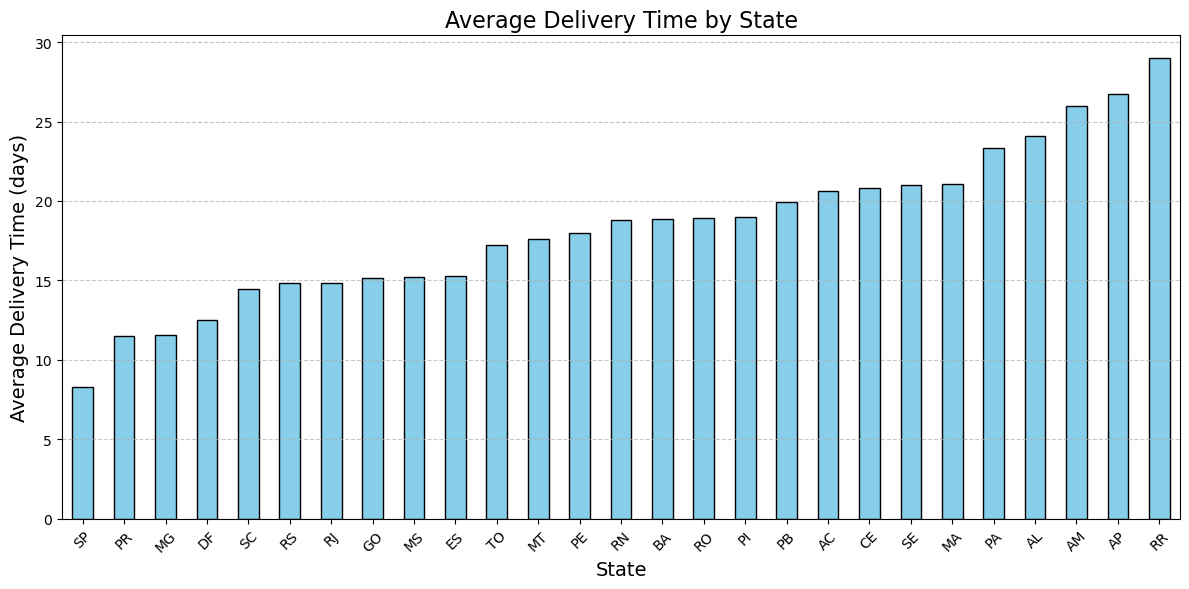

In [75]:
# Step 4: 주(State)별 평균 배송 시간 계산
state_delivery_times = order_customer_geo_df.groupby('customer_state')['delivery_time_days'].mean().sort_values()

# Step 5: 시각화
plt.figure(figsize=(12, 6))
state_delivery_times.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Delivery Time by State', fontsize=16)
plt.ylabel('Average Delivery Time (days)', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 2. 주별 주문량

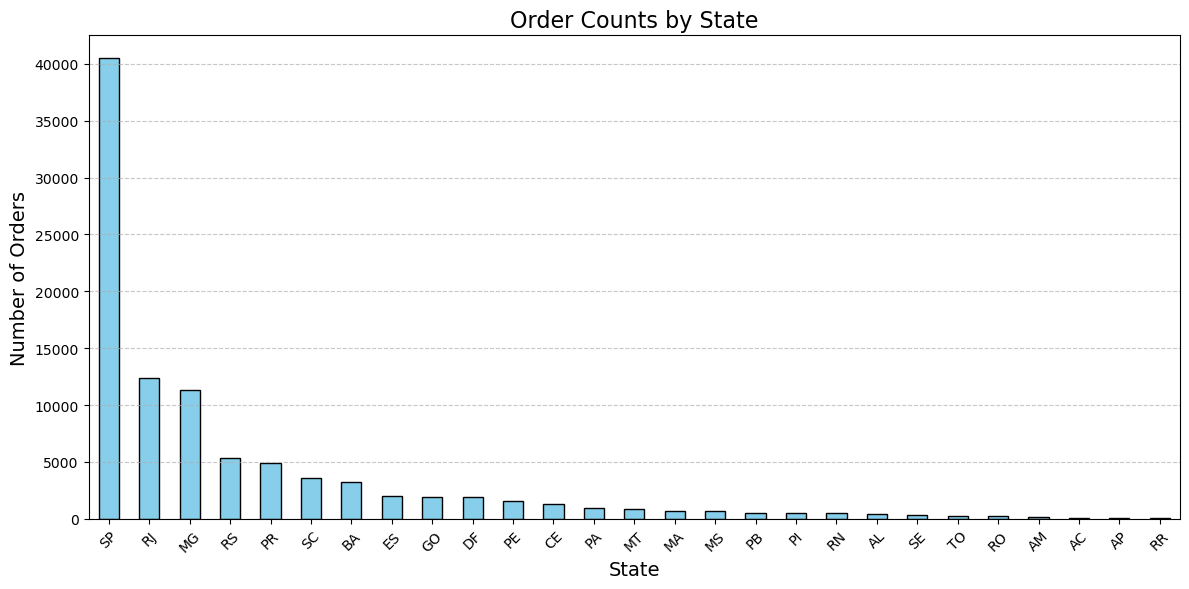

In [76]:
# 주(State)별 주문량 계산
state_order_counts = order_customer_geo_df.groupby('customer_state')['order_id'].count().sort_values(ascending=False)

# 시각화 (주문량)
state_order_counts.plot(kind='bar', figsize=(12, 6), color='skyblue', edgecolor='black')
plt.title('Order Counts by State', fontsize=16)
plt.ylabel('Number of Orders', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### 3. 배송 소요 과정 세분화
- 주문부터 고객에게 배송하기까지 단계별로 얼마나 걸리는지 시각화

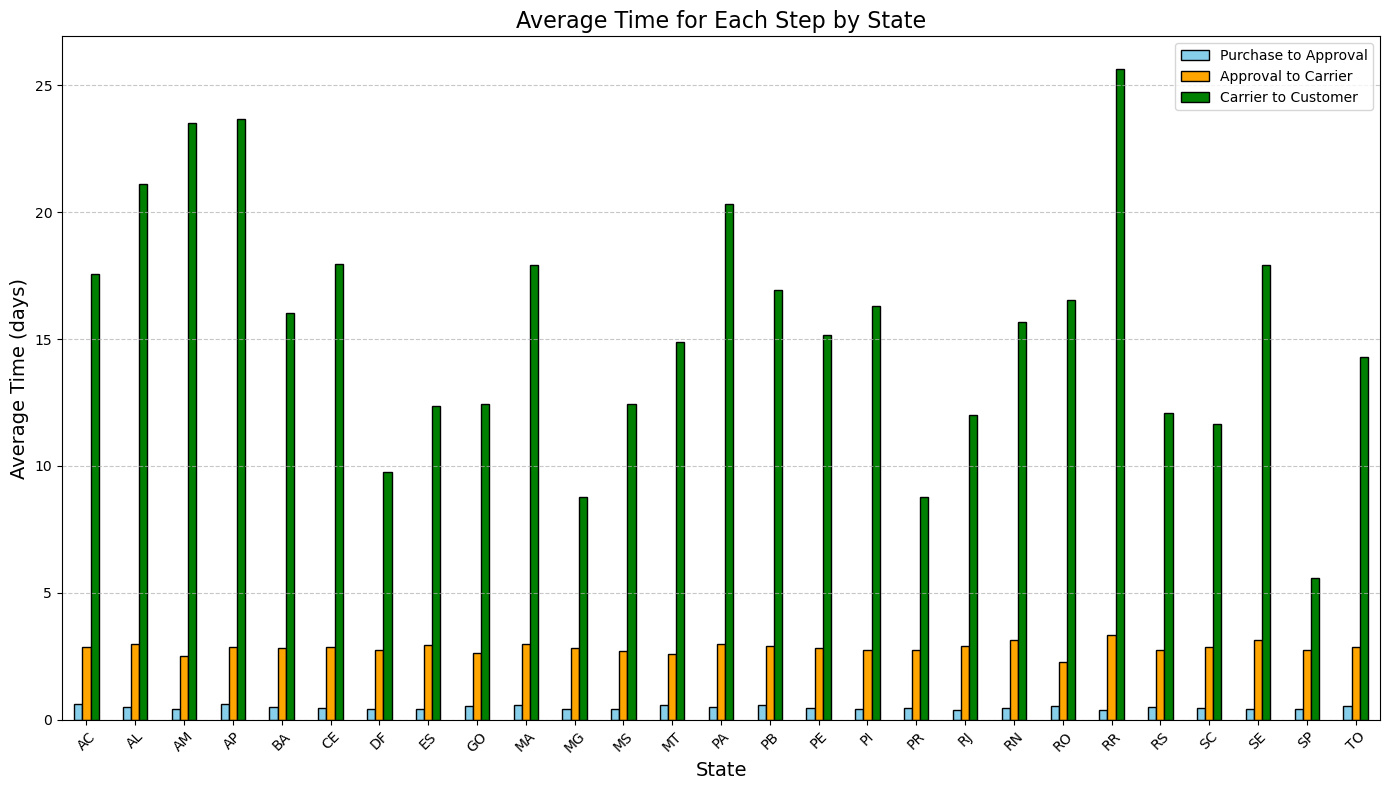

In [77]:
# 시간(시간 단위)을 일(day) 단위로 변환
order_customer_geo_df['purchase_to_approval_days'] = order_customer_geo_df['purchase_to_approval'] / 24
order_customer_geo_df['approval_to_carrier_days'] = order_customer_geo_df['approval_to_carrier'] / 24
order_customer_geo_df['carrier_to_customer_days'] = order_customer_geo_df['carrier_to_customer'] / 24

# 주(State)별 평균 소요 시간 계산
state_times = order_customer_geo_df.groupby('customer_state').agg(
    purchase_to_approval_avg=('purchase_to_approval_days', 'mean'),
    approval_to_carrier_avg=('approval_to_carrier_days', 'mean'),
    carrier_to_customer_avg=('carrier_to_customer_days', 'mean')
).sort_index()

# 시각화 (단계별 소요 시간 비교)
state_times.plot(kind='bar', figsize=(14, 8), color=['skyblue', 'orange', 'green'], edgecolor='black')
plt.title('Average Time for Each Step by State', fontsize=16)
plt.ylabel('Average Time (days)', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.xticks(rotation=45)
plt.legend(['Purchase to Approval', 'Approval to Carrier', 'Carrier to Customer'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 4. 판매자 지역별 평균 배송 기간

In [78]:
seller_df = pd.read_csv('olist_sellers_dataset.csv') # 판매자 데이터

print(f'고객 데이터 개수: {len(seller_df)}')
seller_df.head(1)

고객 데이터 개수: 3095


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP


In [79]:
order_items_df = pd.read_csv('olist_order_items_dataset.csv') # 판매자 데이터

print(f'주문 상세 데이터 개수: {len(order_items_df)}') # seller_id 때문에 order_items df가 필요
order_items_df.head(1)

주문 상세 데이터 개수: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


In [80]:
# 주문 상세 데이터와 판매자 데이터 병합
order_items_with_sellers = pd.merge(order_items_df, seller_df, on='seller_id', how='left')

print(len(order_items_with_sellers))
order_items_with_sellers.head(1)

112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,27277,volta redonda,SP


In [81]:
# example
order_items_with_sellers[order_items_with_sellers['order_id']=='cd51709c98c738351915f79c4318675e'] # 상품 7개 주문

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
90414,cd51709c98c738351915f79c4318675e,1,3bb3e5caf47c7e92ed97227247e942a8,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,320.0,25.69,8820,mogi das cruzes,SP
90415,cd51709c98c738351915f79c4318675e,2,e9b3cf27d68caa64832c4a7c460abcb9,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,160.0,33.02,8820,mogi das cruzes,SP
90416,cd51709c98c738351915f79c4318675e,3,3bb3e5caf47c7e92ed97227247e942a8,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,320.0,25.69,8820,mogi das cruzes,SP
90417,cd51709c98c738351915f79c4318675e,4,3ebbc0870d51b62783c45e0e61ccb78d,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,52.0,38.54,8820,mogi das cruzes,SP
90418,cd51709c98c738351915f79c4318675e,5,3ebbc0870d51b62783c45e0e61ccb78d,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,52.0,38.54,8820,mogi das cruzes,SP
90419,cd51709c98c738351915f79c4318675e,6,e9b3cf27d68caa64832c4a7c460abcb9,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,160.0,33.02,8820,mogi das cruzes,SP
90420,cd51709c98c738351915f79c4318675e,7,3ebbc0870d51b62783c45e0e61ccb78d,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,52.0,38.54,8820,mogi das cruzes,SP


In [82]:
# order_id별 고유한 seller_id 개수 계산
seller_count_per_order = order_items_with_sellers.groupby('order_id')['seller_id'].nunique()

# seller_id가 2개 이상인 order_id 필터링
multiple_sellers = seller_count_per_order[seller_count_per_order > 1]

# 결과 출력
print(f"seller_id가 2개 이상인 order_id 개수: {len(multiple_sellers)}")
print(multiple_sellers.head())  # 일부 결과 확인

seller_id가 2개 이상인 order_id 개수: 1278
order_id
002f98c0f7efd42638ed6100ca699b42    2
00bcee890eba57a9767c7b5ca12d3a1b    2
01144cadcf64b6427f0a6580a3033220    2
013a98b3a668bcef05b98898177f6923    2
014405982914c2cde2796ddcf0b8703d    2
Name: seller_id, dtype: int64


In [83]:
# order_id와 seller_id의 조합 기준으로 중복 제거
orders_with_sellers_unique = order_items_with_sellers.drop_duplicates(subset=['order_id', 'seller_id'])

# 결과 확인
print(len(orders_with_sellers_unique))
orders_with_sellers_unique.head()


100010


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [84]:
# example
orders_with_sellers_unique[orders_with_sellers_unique['order_id']=='cd51709c98c738351915f79c4318675e'] # 판매자가 같은 상품 7개 주문

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
90414,cd51709c98c738351915f79c4318675e,1,3bb3e5caf47c7e92ed97227247e942a8,7d456afc660226829370f3173d14520c,2018-02-05 16:31:18,320.0,25.69,8820,mogi das cruzes,SP


In [85]:
orders_with_sellers_unique[orders_with_sellers_unique['order_id']=='002f98c0f7efd42638ed6100ca699b42'] # 판매자가 다른 2개의 상품 주문

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
80,002f98c0f7efd42638ed6100ca699b42,1,d41dc2f2979f52d75d78714b378d4068,7299e27ed73d2ad986de7f7c77d919fa,2017-08-10 09:30:15,8.99,32.57,38440,araguari,MG
81,002f98c0f7efd42638ed6100ca699b42,2,880be32f4db1d9f6e2bec38fb6ac23ab,fa40cc5b934574b62717c68f3d678b6d,2017-08-10 09:30:15,44.90,7.16,2310,sao paulo,SP


In [86]:
# 주문 상세 + 판매자 데이터와 주문 데이터 병합하여 배송 정보 포함
orders_with_sellers = pd.merge(order_customer_geo_df, orders_with_sellers_unique, on='order_id', how='left')

print(len(orders_with_sellers))
orders_with_sellers.head(1)

97546


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,carrier_to_customer_days,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,6.06265,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,9350,maua,SP


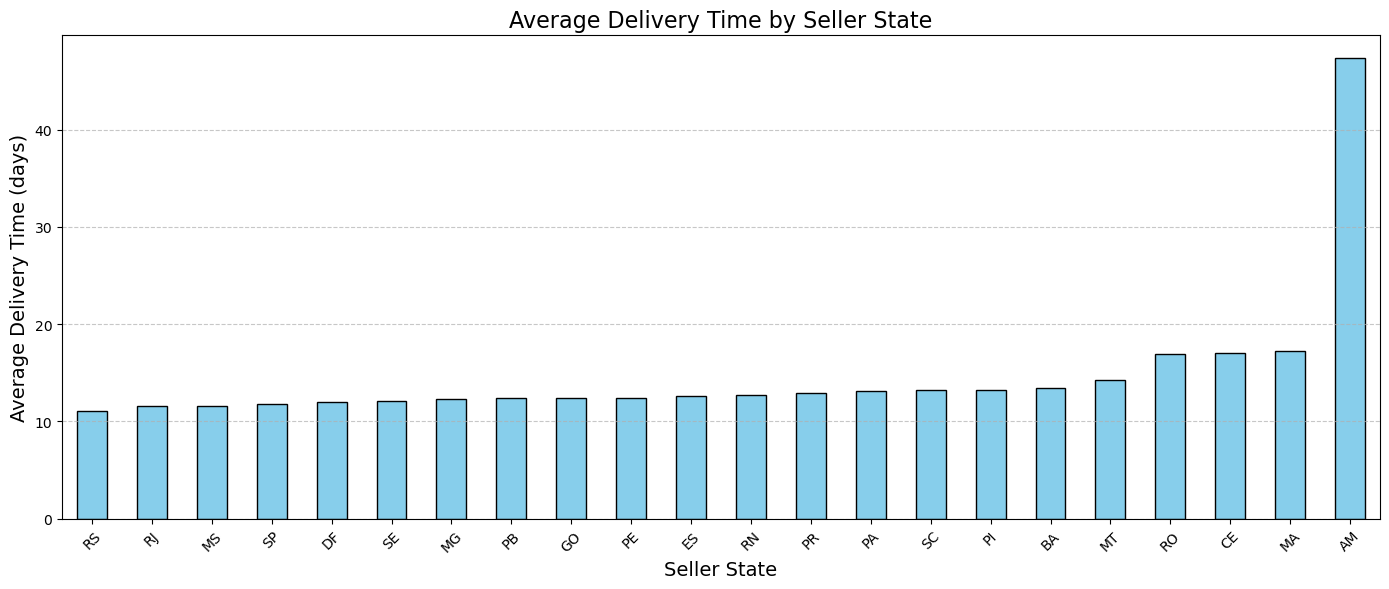

In [87]:
# 판매자 지역(seller_state)별 평균 배송 기간 계산
seller_state_delivery = orders_with_sellers.groupby('seller_state')['delivery_time_days'].mean().sort_values()

plt.figure(figsize=(14, 6))
seller_state_delivery.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Delivery Time by Seller State', fontsize=16)
plt.xlabel('Seller State', fontsize=14)
plt.ylabel('Average Delivery Time (days)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 5. 리뷰 데이터 분석

In [93]:
review_df = pd.read_csv("olist_order_reviews_dataset.csv") # 리뷰

print(f'리뷰 데이터 개수: {len(order_df)}')
review_df.head(1)

리뷰 데이터 개수: 96475


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59


In [94]:
# 전처리 해둔 order_customer_geo_df와 review_df merge
order_customer_geo_review_df = pd.merge(order_customer_geo_df, review_df, on='order_id', how='left')

print(len(order_customer_geo_review_df))
order_customer_geo_review_df.head(1)

96745


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,carrier_to_customer,purchase_to_approval_days,approval_to_carrier_days,carrier_to_customer_days,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,145.503611,0.007431,2.366493,6.06265,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48


In [ ]:
# order_customer_geo_review_df와 order_items_df merge
order_customer_geo_review_df = pd.merge(order_customer_geo_review_df, order_items_df, on='order_id', how='left')

print(len(order_customer_geo_review_df))
order_customer_geo_review_df.head(1)

110553


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72


In [105]:
order_customer_geo_review_df['freight_value']

0          8.72
1         22.76
2         19.22
3         27.20
4          8.72
          ...  
110548    20.10
110549    65.02
110550    40.59
110551    40.59
110552    18.36
Name: freight_value, Length: 110553, dtype: float64

In [108]:
pd.cut(order_customer_geo_review_df['freight_value'], bins=5)

0         (-0.41, 81.936]
1         (-0.41, 81.936]
2         (-0.41, 81.936]
3         (-0.41, 81.936]
4         (-0.41, 81.936]
               ...       
110548    (-0.41, 81.936]
110549    (-0.41, 81.936]
110550    (-0.41, 81.936]
110551    (-0.41, 81.936]
110552    (-0.41, 81.936]
Name: freight_value, Length: 110553, dtype: category
Categories (5, interval[float64, right]): [(-0.41, 81.936] < (81.936, 163.872] < (163.872, 245.808] < (245.808, 327.744] < (327.744, 409.68]]

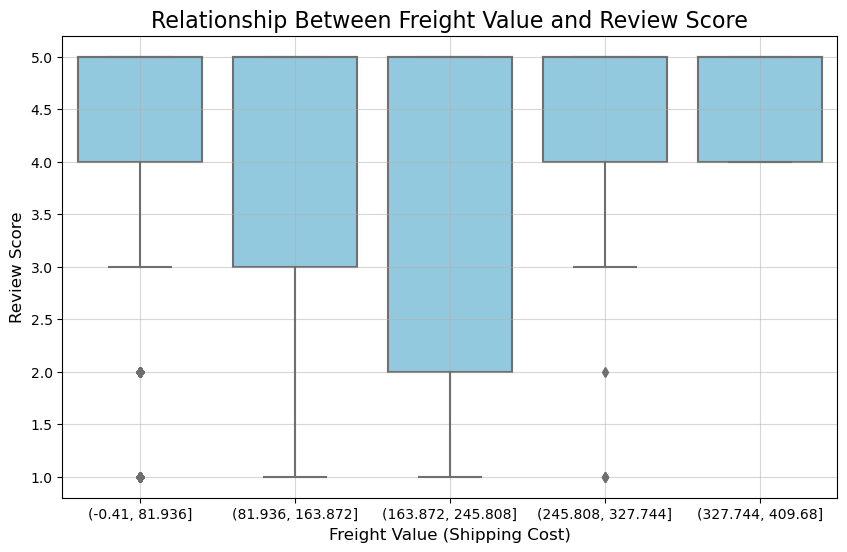

In [104]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=order_customer_geo_review_df,
    x=pd.cut(order_customer_geo_review_df['freight_value'], bins=5),
    y='review_score',
    color='skyblue'
)

plt.title('Relationship Between Freight Value and Review Score', fontsize=16)
plt.xlabel('Freight Value (Shipping Cost)', fontsize=12)
plt.ylabel('Review Score', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

### 6. 리뷰 키워드 추출

In [109]:
pip install wordcloud --quiet

Note: you may need to restart the kernel to use updated packages.


C:\Users\eunseok\AppData\Local\Temp\ipykernel_16416\1190074155.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_score_reviews['keywords'] = low_score_reviews['review_comment_message'].apply(lambda x: extract_keywords(x, keywords))


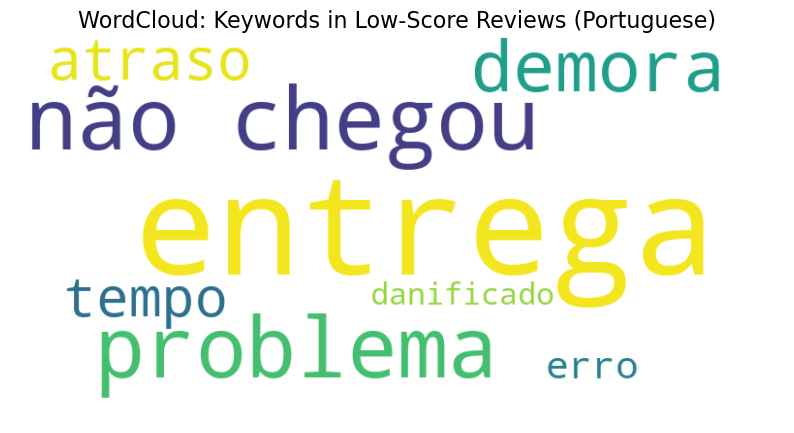

포르투갈어 배송 관련 키워드 빈도:
atraso: 192회
demora: 308회
entrega: 1990회
não chegou: 474회
erro: 72회
problema: 454회
tempo: 172회
danificado: 42회

낮은 점수 리뷰의 평균 배송 시간: 18.28일


In [115]:
from wordcloud import WordCloud
from collections import Counter
import re

# Step 1: 낮은 점수 리뷰 텍스트 분석 (포르투갈어 키워드 사용)
# 낮은 점수(1~2점) 리뷰 필터링
low_score_reviews = order_customer_geo_review_df[(order_customer_geo_review_df['review_score'] == 1) | (order_customer_geo_review_df['review_score'] == 2)]

# 포르투갈어 키워드 설정
keywords = ['atraso', 'demora', 'entrega', 'problema', 'erro', 'tempo', 'não chegou', 'danificado']

# 키워드 추출 함수
def extract_keywords(text, keyword_list):
    if pd.isna(text):
        return []
    return [word for word in keyword_list if word in text.lower()]

# 키워드 추출 및 빈도 계산
low_score_reviews['keywords'] = low_score_reviews['review_comment_message'].apply(lambda x: extract_keywords(x, keywords))
all_keywords = Counter([word for sublist in low_score_reviews['keywords'] for word in sublist])

# Step 2: 키워드 시각화 (워드클라우드)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(all_keywords)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud: Keywords in Low-Score Reviews (Portuguese)', fontsize=16)
plt.show()

# Step 3: 결과 요약
print("포르투갈어 배송 관련 키워드 빈도:")
for word, count in all_keywords.items():
    print(f"{word}: {count}회")

# Step 4: 낮은 리뷰 점수와 평균 배송 시간 출력
avg_delivery_time_low_reviews = low_score_reviews['delivery_time_days'].mean()
print(f"\n낮은 점수 리뷰의 평균 배송 시간: {avg_delivery_time_low_reviews:.2f}일")


## Solution: 배송기간을 줄여 고객 만족도를 높이기 위해 fulfillment 추가